In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Select only the first two features for visualization
X = X[:, :2]

# Split into train and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)


In [12]:
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import matplotlib.pyplot as plt

knn_uniform = KNeighborsClassifier(n_neighbors=11, weights='uniform')
knn_distance = KNeighborsClassifier(n_neighbors=11, weights='distance')

knn_uniform.fit(X_train_scaled, y_train)
knn_distance.fit(X_train_scaled, y_train)


KNeighborsClassifier(n_neighbors=11, weights='distance')

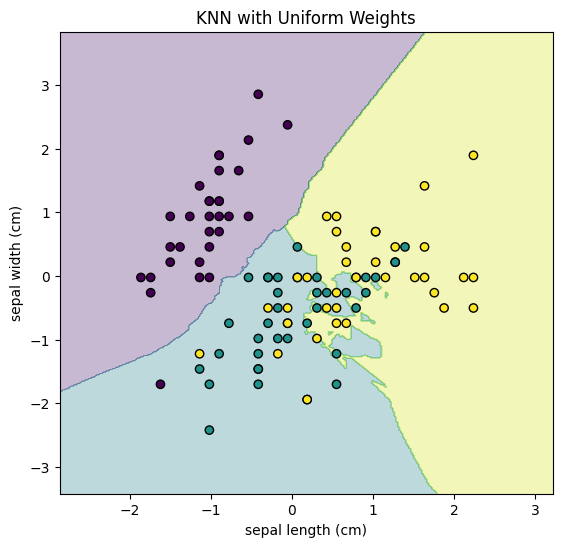

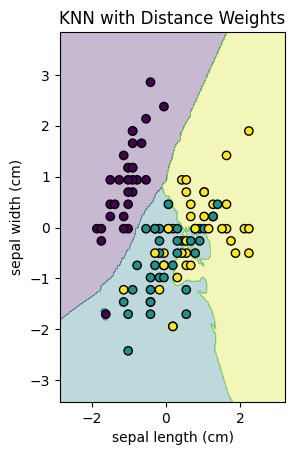

In [13]:


def plot_decision_boundaries(X, y, clf, title):
    # Create a meshgrid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the meshgrid
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', marker='o')
    plt.title(title)
    plt.xlabel(iris.feature_names[0])
    plt.ylabel(iris.feature_names[1])
    plt.show()

# Plot decision boundaries
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plot_decision_boundaries(X_train_scaled, y_train, knn_uniform, "KNN with Uniform Weights")

plt.subplot(1, 2, 2)
plot_decision_boundaries(X_train_scaled, y_train, knn_distance, "KNN with Distance Weights")

